# Text Embeddings and Cosine Similarity

I use Gemini's text-embedding-004 model to generate embeddings for sentences. Then I define a cosine similarity function and see what it returns for a few related and unrelated sentences.

## Setup

In [34]:
from fastcore.utils import *
import google.generativeai as genai
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [3]:
genai.configure(api_key=os.getenv('GEMINI_API_KEY'))

## Generating an Embedding

In [46]:
result = genai.embed_content(model="models/text-embedding-004", content="What is the meaning of life?")

In [50]:
str(result)[:100]

"{'embedding': [-0.010632273, 0.019375853, 0.020965198, 0.0007706437, -0.061464068, 0.014739741, -0.0"

In [5]:
e = L(result['embedding'])
e

(#768) [-0.010632273,0.019375853,0.020965198,0.0007706437,-0.061464068,0.014739741,-0.0022759985,0.013184195,0.014464715,0.022593116,0.02184836,-0.059616957,0.06032222,-0.047657482,0.017848385,-0.10987464,-0.0598155,-0.00479664,-0.043298274,-0.05090505...]

## Generate More Embeddings

In [19]:
sentences = [
    "Why do we exist?",
    "What's the purpose of existence?",
    "What is the meaning of cookies?",
    "How do I bake cookies?",
    "What's the meaning of life?"
]

Get an embedding for each sentence:

In [20]:
def embed(s): return genai.embed_content("models/text-embedding-004", s)
ems = L(sentences).map(embed)
ems

(#5) [{'embedding': [0.019559344, 0.019688405, -0.038842924, 0.012698846, -0.035833146, 0.028341196, 0.052558787, -0.019968225, -0.010917543, 0.03131587, -0.017641881, -0.011561374, 0.06553263, -0.033051796, -0.005336117, -0.07849998, -0.05368801, -0.029812962, -0.0692188, -0.008345575, 0.047584742, -0.03687471, 0.039014176, -0.033440135, 0.002978692, 0.042214964, 0.036658864, 0.045153357, -0.0041409903, -0.05310909, 0.013112881, 0.0066154776, 0.013813996, -0.034904897, 0.008139633, -0.017468236, -0.030165534, 0.05193462, 0.04006202, -0.013289335, -0.04039274, 0.009033101, -0.0142124, -0.0248393, 0.020853698, 0.021040585, 0.054452818, -0.025659267, 0.013948726, 0.07748278, 0.03256458, 0.016619649, -0.059931885, -0.01200441, -0.004653669, -0.017855817, -0.03539421, -0.023281118, 0.026218886, -0.023804223, -0.022577595, 0.008715175, -0.04725901, -0.03219246, -0.035418466, 0.08307132, -0.023135524, -0.0073083555, -0.020209154, 0.04700945, -0.023403414, 0.053417407, -0.020986862, 0.0048602

Convert the embeddings to numpy arrays:

In [21]:
vectors = L(ems).attrgot('embedding').map(np.array)
vectors

(#5) [array([ 1.95593440e-02,  1.96884050e-02, -3.88429240e-02,  1.26988460e-02,
       -3.58331460e-02,  2.83411960e-02,  5.25587870e-02, -1.99682250e-02,
       -1.09175430e-02,  3.13158700e-02, -1.76418810e-02, -1.15613740e-02,
        6.55326300e-02, -3.30517960e-02, -5.33611700e-03, -7.84999800e-02,
       -5.36880100e-02, -2.98129620e-02, -6.92188000e-02, -8.34557500e-03,
        4.75847420e-02, -3.68747100e-02,  3.90141760e-02, -3.34401350e-02,
        2.97869200e-03,  4.22149640e-02,  3.66588640e-02,  4.51533570e-02,
       -4.14099030e-03, -5.31090900e-02,  1.31128810e-02,  6.61547760e-03,
        1.38139960e-02, -3.49048970e-02,  8.13963300e-03, -1.74682360e-02,
       -3.01655340e-02,  5.19346200e-02,  4.00620200e-02, -1.32893350e-02,
       -4.03927400e-02,  9.03310100e-03, -1.42124000e-02, -2.48393000e-02,
        2.08536980e-02,  2.10405850e-02,  5.44528180e-02, -2.56592670e-02,
        1.39487260e-02,  7.74827800e-02,  3.25645800e-02,  1.66196490e-02,
       -5.99318850e

## Cosine Similarity

In [39]:
def cos_sim(a,b): 
    "Normalized dot product of 2 embedding vectors"
    return (a@b)/(np.linalg.norm(a)*np.linalg.norm(b))

Credit: This function is from [How to Solve It With Code, Lesson 14](https://solveit.fast.ai/).

I looked for a predefined version of `cos_sim` to import and use. The closest I found was [scikit-learn's cosine_similarity function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) which returns a similarity matrix. In a future notebook I'd love to use that. Right now, however, I just want to see how similar 2 embeddings are.

## 2 Existential Questions: High Similarity

In [23]:
f"{sentences[0]} vs. {sentences[1]}"

"Why do we exist? vs. What's the purpose of existence?"

In [24]:
cos_sim(vectors[0],vectors[1])

np.float64(0.8600727311535673)

## Existential Question vs. Cookie Question: Low Similarity

In [25]:
f"{sentences[0]} vs. {sentences[3]}"

'Why do we exist? vs. How do I bake cookies?'

In [26]:
cos_sim(vectors[0],vectors[3])

np.float64(0.3447009083349241)

## Meanings: Low Similarity

In [28]:
f"{sentences[4]} vs. {sentences[2]}"

"What's the meaning of life? vs. What is the meaning of cookies?"

In [29]:
cos_sim(vectors[4],vectors[2])

np.float64(0.4140377538392055)

## Similarity Matrix

Comparing each sentence to each other one:

In [35]:
sim_matrix = np.zeros((len(vectors), len(vectors)))
for i in range(len(vectors)):
    for j in range(len(vectors)):
        sim_matrix[i,j] = cos_sim(vectors[i], vectors[j])
sim_matrix

array([[1.        , 0.86007273, 0.3820777 , 0.34470091, 0.70588275],
       [0.86007273, 1.        , 0.37772974, 0.2912788 , 0.79532732],
       [0.3820777 , 0.37772974, 1.        , 0.64658825, 0.41403775],
       [0.34470091, 0.2912788 , 0.64658825, 1.        , 0.29899486],
       [0.70588275, 0.79532732, 0.41403775, 0.29899486, 1.        ]])

Now we can plot a heatmap of these, to build our intuition:

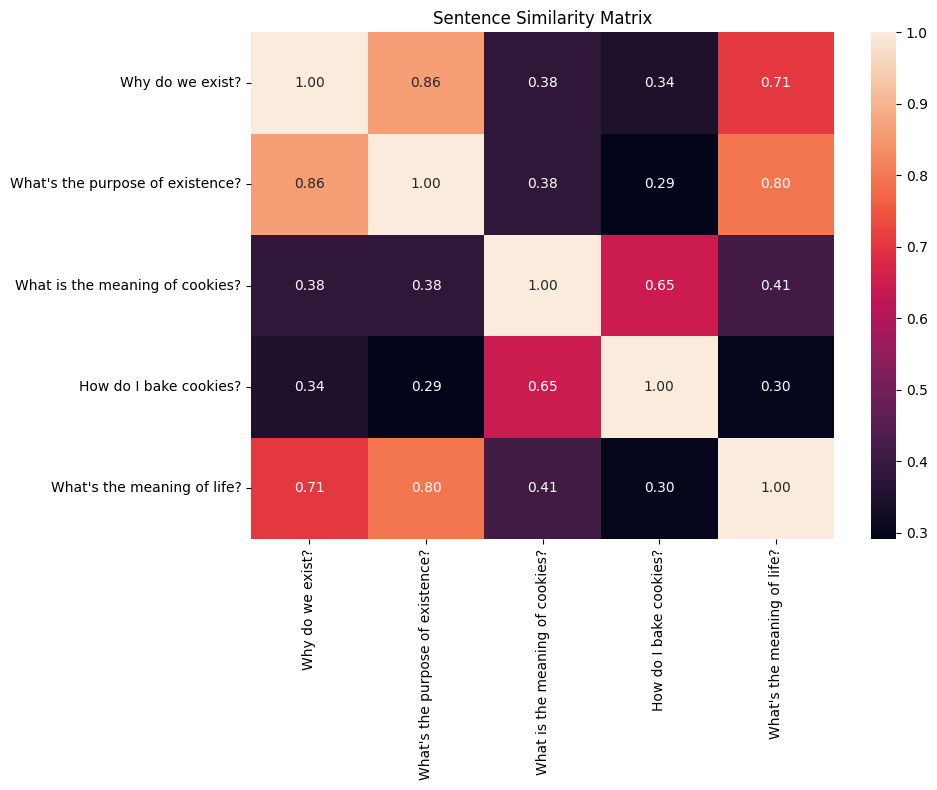

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(sim_matrix, annot=True, fmt='.2f', 
            xticklabels=sentences, yticklabels=sentences)
plt.title('Sentence Similarity Matrix')
plt.tight_layout()

## Summary

Embeddings can capture meaningful semantic relationships between sentences or other text.

* I used Gemini's text-embedding-004 model to convert sentences to embeddings.
* Cosine similarity between embedding vectors shows:
    * Semantically related sentences like "Why do we exist?" and "What's the purpose of existence?" have high similarity scores (0.86)
    * Unrelated pairs like existential questions versus cookie questions have much lower scores (0.34-0.38)
* A heatmap visualization can really help to show these relationships clearly. 